## EDA 및 전처리

### 데이터 불러오기 및 간단하게 데이터 살펴보기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

print('train df')
display(train.head())
print('test df')
display(test.head())

train df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
id,,,,,,,,,,,,,,,
0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


test df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
id,,,,,,,,,,,,,,
0,47,Private,304133,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
1,34,Self-emp-inc,154227,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,75,United-States
2,31,Local-gov,158291,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,8614,0,40,United-States
3,28,Private,183155,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
4,54,Local-gov,182543,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico


In [ ]:
print("shape of train: " , train.shape)
print("shape of test: ", test.shape)

shape of train:  (17480, 15)
shape of test:  (15081, 14)


In [ ]:
# train 값은 결측치가 존재함을 확인할 수 있다.
# column은 13개이고, row는 17480개이다.
# 범주형 변수는 workclass, eudcation, matrial.status, occupation, relationship, race, sex 이다.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17480 entries, 0 to 17479
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             17480 non-null  int64 
 1   workclass       15644 non-null  object
 2   fnlwgt          17480 non-null  int64 
 3   education       17480 non-null  object
 4   education.num   17480 non-null  int64 
 5   marital.status  17480 non-null  object
 6   occupation      15637 non-null  object
 7   relationship    17480 non-null  object
 8   race            17480 non-null  object
 9   sex             17480 non-null  object
 10  capital.gain    17480 non-null  int64 
 11  capital.loss    17480 non-null  int64 
 12  hours.per.week  17480 non-null  int64 
 13  native.country  16897 non-null  object
 14  target          17480 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.1+ MB


In [ ]:
# train의 경우, workclass, occupation, native country에서 결측치가 확인됨.
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

In [ ]:
# 결측치 없음
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15081 entries, 0 to 15080
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15081 non-null  int64 
 1   workclass       15081 non-null  object
 2   fnlwgt          15081 non-null  int64 
 3   education       15081 non-null  object
 4   education.num   15081 non-null  int64 
 5   marital.status  15081 non-null  object
 6   occupation      15081 non-null  object
 7   relationship    15081 non-null  object
 8   race            15081 non-null  object
 9   sex             15081 non-null  object
 10  capital.gain    15081 non-null  int64 
 11  capital.loss    15081 non-null  int64 
 12  hours.per.week  15081 non-null  int64 
 13  native.country  15081 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.7+ MB


In [ ]:
train.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,target
count,17480.000000,1.748000e+04,17480.000000,17480.000000,17480.00000,17480.000000,17480.000000
mean,38.720995,1.897610e+05,10.036556,1076.644508,83.87460,40.002460,0.234897
std,14.079617,1.049929e+05,2.604415,7439.498620,396.03288,12.671265,0.423947
min,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000,0.000000
25%,27.000000,1.181558e+05,9.000000,0.000000,0.00000,38.000000,0.000000
50%,37.000000,1.781340e+05,10.000000,0.000000,0.00000,40.000000,0.000000
75%,48.000000,2.373180e+05,12.000000,0.000000,0.00000,45.000000,0.000000
max,90.000000,1.455435e+06,16.000000,99999.000000,4356.00000,99.000000,1.000000


In [ ]:
#describe를 통해 요약 값들을 확인해 보았을 때는 train과 test는 비슷한 분포를 지닌 것으로 보인다(적어도 수치형 변수에 대해서는)
test.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,15081.000000,1.508100e+04,15081.000000,15081.000000,15081.000000,15081.000000
mean,38.420131,1.897985e+05,10.131821,1078.812943,91.278562,40.941648
std,13.111605,1.061955e+05,2.534614,7322.206791,410.820751,11.941720
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176050e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.786490e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.369070e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,3900.000000,99.000000


### 범주형 변수 처리하기

#### workclass

In [ ]:
# train data에는 Never-worked가 존재하지만 test data에는 존재하지 않는다. 따라서 Never-worked를 가진 열은 제외해도 될 것 같다.
train['workclass'].value_counts()

Private             11568
Self-emp-not-inc     1272
Local-gov            1053
State-gov             659
Self-emp-inc          594
Federal-gov           485
Never-worked            7
Without-pay             6
Name: workclass, dtype: int64

In [ ]:
test['workclass'].value_counts()

Private             11128
Self-emp-not-inc     1269
Local-gov            1040
State-gov             639
Self-emp-inc          522
Federal-gov           475
Without-pay             8
Name: workclass, dtype: int64

In [ ]:
# Never-worked 제외
train = train[train['workclass'] != 'Never-worked'].reset_index(drop=True)
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [ ]:
# train에서 target이 1인 비율이 높은 순으로 label을 정하기로 한다
# 따라서 Self-emp-inc, Federal-gov, Local-gov, Self-emp-not-inc, Private, Without-pay순으로 정하기로 한다.
workclass = test['workclass'].unique()

for kind in workclass:
  data = train[train['workclass'] == kind]
  proportion = round(np.sum(data['target']) / len(data),4)
  print(f"{kind}: {proportion}")

Private: 0.2189
Self-emp-inc: 0.5438
Local-gov: 0.301
State-gov: 0.2838
Federal-gov: 0.3773
Self-emp-not-inc: 0.2932
Without-pay: 0.0


In [ ]:
# 한편, 결측치의 경우 제외시키기로 한다(최빈값 혹인 중위 값 등으로 채워넣기에는 무리가 있다.)
train.dropna(subset=['workclass'], inplace=True)
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [ ]:
# 결측치 처리 결과, occupation에 있었던 결측치까지 함께 제거되었다
train.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          0
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    556
target              0
dtype: int64

In [ ]:
map_class = {'Without-pay':0, 'Private':1, 'State-gov':2, 'Self-emp-not-inc':3, 'Local-gov':4, 'Federal-gov': 5, 'Self-emp-inc':6}
train[['workclass']] = train[['workclass']].applymap(map_class.get)
test[['workclass']] = test[['workclass']].applymap(map_class.get)

#### native country

In [ ]:
print("number of unique values: ", train['native.country'].nunique())
train['native.country'].value_counts()

number of unique values:  41


United-States                 13727
Mexico                          322
Philippines                      98
Germany                          66
Puerto-Rico                      54
El-Salvador                      52
Canada                           49
India                            47
Cuba                             46
England                          42
Jamaica                          41
Dominican-Republic               35
Guatemala                        35
Columbia                         34
China                            33
Italy                            33
Poland                           31
South                            30
Japan                            30
Vietnam                          29
Haiti                            21
Taiwan                           19
Nicaragua                        19
Ecuador                          18
Ireland                          18
Portugal                         17
Iran                             16
Peru                        

In [ ]:
#Holand-Netherlands가 없다는 것을 제외하고 같은 나라들이다.
print("number of unique values: ", test['native.country'].nunique())
test['native.country'].value_counts()

number of unique values:  40


United-States                 13777
Mexico                          288
Philippines                      90
Germany                          62
Canada                           58
Puerto-Rico                      55
India                            53
El-Salvador                      48
Cuba                             46
England                          44
South                            41
Jamaica                          39
China                            35
Vietnam                          35
Italy                            35
Dominican-Republic               32
Japan                            29
Guatemala                        28
Iran                             26
Poland                           25
Taiwan                           23
Columbia                         22
Haiti                            21
Portugal                         17
Greece                           15
France                           15
Peru                             14
Nicaragua                   

In [ ]:
# native.country가 NaN인 경우에 대해서는 일단 전체 관측치들 중 native.country가 United-states인 경우가 압도적으로 많으므로 United-states로 설정하자
train['native.country'] = train['native.country'].fillna('United-States')

In [ ]:
# train에서 Holand-Netherlands인 관측치를 삭제한다.
train = train[train['native.country'] != 'Holand-Netherlands']

In [ ]:
# train에서 target이 1인 비율이 높은 순으로 label을 정하기로 한다
country = test['native.country'].unique()
country_dict = {}
for nation in country:
  data = train[train['native.country'] == nation]
  proportion = round(np.sum(data['target']) / len(data),4)
  country_dict[nation] = proportion
country_df = pd.DataFrame(index=country_dict.keys(), data=country_dict.values())
country_df.rename(columns={0:'proportion'}, inplace=True)
display(country_df.head())

,proportion
United-States,0.2569
Mexico,0.0497
Vietnam,0.0345
Iran,0.6875
China,0.2424


In [ ]:
country_df = country_df.sort_values(by='proportion', ascending=False)
country_df.head()

,proportion
Iran,0.6875
Yugoslavia,0.4444
India,0.4043
Japan,0.4000
Canada,0.3878


In [ ]:
map_class2 ={}
for i in range(40):
  map_class2[country_df.index[i]] = i
train[['native.country']] = train[['native.country']].applymap(map_class2.get)
test[['native.country']] = test[['native.country']].applymap(map_class2.get)

#### education

In [ ]:
print("number of unique values: ", train['education'].nunique())
train['education'].value_counts()

number of unique values:  16


HS-grad         5033
Some-college    3388
Bachelors       2669
Masters          873
Assoc-voc        663
11th             545
Assoc-acdm       541
10th             408
7th-8th          305
Prof-school      283
9th              243
12th             209
Doctorate        199
5th-6th          167
1st-4th           84
Preschool         26
Name: education, dtype: int64

In [ ]:
print("number of unique values: ",test['education'].nunique())
test['education'].value_counts()

number of unique values:  16


HS-grad         4935
Some-college    3386
Bachelors       2513
Masters          802
Assoc-voc        658
11th             511
Assoc-acdm       479
10th             423
Prof-school      275
7th-8th          268
9th              220
Doctorate        199
12th             184
5th-6th          136
1st-4th           72
Preschool         20
Name: education, dtype: int64

In [ ]:
# train과 test의 범주가 같고, 각각의 범주가 무엇을 의미하는 지 알고 있다. 
# 교육수준이 낮은 순서부터 높은 순서대로 label을 정하기로 하자.
map_class3 = {'Preschool':0, '1st-4th':1, '5th-6th':2, '7th-8th':3, '9th':4, '10th': 5, '11th':6,
              '12th':7, 'HS-grad':8, 'Prof-school':9, 'Assoc-acdm':10, 'Assoc-voc':11,
              'Some-college':12, 'Bachelors':13, 'Masters':14, 'Doctorate':15}
train[['education']] = train[['education']].applymap(map_class3.get)
test[['education']] = test[['education']].applymap(map_class3.get)

#### marital.status

In [ ]:
print("number of unique values: ", train['marital.status'].nunique())
train['marital.status'].value_counts()

number of unique values:  7


Married-civ-spouse       7366
Never-married            4999
Divorced                 2130
Separated                 474
Widowed                   437
Married-spouse-absent     218
Married-AF-spouse          12
Name: marital.status, dtype: int64

In [ ]:
print("number of unique values: ", test['marital.status'].nunique())
test['marital.status'].value_counts()

number of unique values:  7


Married-civ-spouse       6973
Never-married            4912
Divorced                 2128
Separated                 485
Widowed                   403
Married-spouse-absent     171
Married-AF-spouse           9
Name: marital.status, dtype: int64

In [ ]:
# train에서 target이 1인 비율이 높은 순으로 label을 정하기로 한다
# 따라서 Married-civ-spouse, Married-AF-spouse, Divorced, Widowed, Married-spouse-absent, Separated, Never-married 순으로 label을 정하기로 하자.
marital_status = test['marital.status'].unique()

for status in marital_status:
  data = train[train['marital.status'] == status]
  proportion = round(np.sum(data['target']) / len(data),4)
  print(f"{status}: {proportion}")

Married-civ-spouse: 0.4519
Never-married: 0.0488
Widowed: 0.1007
Divorced: 0.1131
Married-spouse-absent: 0.0826
Separated: 0.0717
Married-AF-spouse: 0.4167


In [ ]:
map_class4 = {'Never-married':0, 'Separated':1, 'Married-spouse-absent':2, 'Widowed':3, 'Divorced':4, 'Married-AF-spouse': 5, 'Married-civ-spouse':6}
train[['marital.status']] = train[['marital.status']].applymap(map_class4.get)
test[['marital.status']] = test[['marital.status']].applymap(map_class4.get)

#### occupation

In [ ]:
print("number of unique values: ", train['occupation'].nunique())
train['occupation'].value_counts()

number of unique values:  14


Exec-managerial      2113
Craft-repair         2101
Prof-specialty       2085
Adm-clerical         1893
Sales                1829
Other-service        1677
Machine-op-inspct    1039
Transport-moving      785
Handlers-cleaners     695
Farming-fishing       508
Tech-support          475
Protective-serv       350
Priv-house-serv        83
Armed-Forces            3
Name: occupation, dtype: int64

In [ ]:
print("number of unique values: ", train['occupation'].nunique())
test['occupation'].value_counts()

number of unique values:  14


Prof-specialty       2055
Craft-repair         1998
Exec-managerial      1953
Adm-clerical         1877
Sales                1821
Other-service        1618
Machine-op-inspct     962
Transport-moving      812
Handlers-cleaners     675
Farming-fishing       486
Tech-support          453
Protective-serv       299
Priv-house-serv        66
Armed-Forces            6
Name: occupation, dtype: int64

In [ ]:
# train에서 target이 1인 비율이 높은 순으로 label을 정하기로 한다
occupations = test['occupation'].unique()

for job in occupations:
  data = train[train['occupation'] == job]
  proportion = round(np.sum(data['target']) / len(data),4)
  print(f"{job}: {proportion}")

Exec-managerial: 0.4841
Sales: 0.2712
Craft-repair: 0.227
Prof-specialty: 0.4523
Adm-clerical: 0.1384
Other-service: 0.0429
Protective-serv: 0.3229
Handlers-cleaners: 0.0561
Transport-moving: 0.1911
Tech-support: 0.2989
Machine-op-inspct: 0.128
Farming-fishing: 0.128
Priv-house-serv: 0.0
Armed-Forces: 0.0


In [ ]:
map_class5 = {'Armed-Forces':0, 'Priv-house-serv':1, 'Other-service':2, 'Handlers-cleaners':3, 'Machine-op-inspct':4, 
              'Farming-fishing': 5, 'Adm-clerical':6, 'Transport-moving':7, 'Craft-repair':8, 'Sales':9,
              'Tech-support':10, 'Protective-serv':11, 'Prof-specialty':12, 'Exec-managerial':13}
train[['occupation']] = train[['occupation']].applymap(map_class5.get)
test[['occupation']] = test[['occupation']].applymap(map_class5.get)

#### relationship

In [ ]:
print("number of unique values: ", train['relationship'].nunique())
train['relationship'].value_counts()

number of unique values:  6


Husband           6483
Not-in-family     3975
Own-child         2291
Unmarried         1647
Wife               771
Other-relative     469
Name: relationship, dtype: int64

In [ ]:
print("number of unique values: ", test['relationship'].nunique())
test['relationship'].value_counts()

number of unique values:  6


Husband           6221
Not-in-family     3890
Own-child         2234
Unmarried         1624
Wife               664
Other-relative     448
Name: relationship, dtype: int64

In [ ]:
# train에서 target이 1인 비율이 높은 순으로 label을 정하기로 한다
relationship = test['relationship'].unique()

for relation in relationship:
  data = train[train['relationship'] == relation]
  proportion = round(np.sum(data['target']) / len(data),4)
  print(f"{relation}: {proportion}")

Husband: 0.454
Not-in-family: 0.1117
Unmarried: 0.0638
Own-child: 0.0162
Other-relative: 0.0426
Wife: 0.4747


In [ ]:
map_class6 = {'Own-child':0, 'Other-relative':1, 'Unmarried':2, 'Not-in-family':3, 'Husband':4, 'Wife': 5}
train[['relationship']] = train[['relationship']].applymap(map_class6.get)
test[['relationship']] = test[['relationship']].applymap(map_class6.get)

#### race

In [ ]:
print("number of unique values: ", train['race'].nunique())
train['race'].value_counts()

number of unique values:  5


White                 13348
Black                  1487
Asian-Pac-Islander      521
Amer-Indian-Eskimo      140
Other                   140
Name: race, dtype: int64

In [ ]:
print("number of unique values: ", test['race'].nunique())
test['race'].value_counts()

number of unique values:  5


White                 12952
Black                  1422
Asian-Pac-Islander      453
Amer-Indian-Eskimo      146
Other                   108
Name: race, dtype: int64

In [ ]:
# train에서 target이 1인 비율이 높은 순으로 label을 정하기로 한다
races = test['race'].unique()

for race in races:
  data = train[train['race'] == race]
  proportion = round(np.sum(data['target']) / len(data),4)
  print(f"{race}: {proportion}")

White: 0.2671
Asian-Pac-Islander: 0.2514
Black: 0.1237
Amer-Indian-Eskimo: 0.1571
Other: 0.0929


In [ ]:
map_class7 = {'Other':0, 'Black':1, 'Amer-Indian-Eskimo':2, 'Asian-Pac-Islander':3, 'White':4}
train[['race']] = train[['race']].applymap(map_class7.get)
test[['race']] = test[['race']].applymap(map_class7.get)

#### sex

In [ ]:
print("number of unique values: ", train['sex'].nunique())
train['sex'].value_counts()

number of unique values:  2


Male      10588
Female     5048
Name: sex, dtype: int64

In [ ]:
print("number of unique values: ", test['sex'].nunique())
test['sex'].value_counts()

number of unique values:  2


Male      10200
Female     4881
Name: sex, dtype: int64

In [ ]:
map_class8 = {'Female':0, 'Male':1}
train[['sex']] = train[['sex']].applymap(map_class8.get)
test[['sex']] = test[['sex']].applymap(map_class8.get)

#### 확인

In [ ]:
display(train.head())
display(test.head())

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,32,1,309513,10,12,6,8,4,4,1,0,0,40,15,0
1,33,1,205469,12,10,6,13,4,4,1,0,0,40,15,1
2,46,1,149949,12,10,6,8,4,4,1,0,0,40,15,0
3,23,1,193090,13,13,0,6,0,4,0,0,0,30,15,0
4,55,1,60193,8,9,4,6,3,4,0,0,0,40,15,0


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
id,,,,,,,,,,,,,,
0,47,1,304133,12,10,6,13,4,4,1,0,0,45,15
1,34,6,154227,12,10,0,9,3,4,1,0,0,75,15
2,31,4,158291,13,13,0,8,3,4,1,8614,0,40,15
3,28,1,183155,13,13,6,12,4,4,1,0,0,55,15
4,54,4,182543,12,10,3,6,2,4,0,0,0,40,29


In [ ]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
target            0
dtype: int64

In [ ]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

### 스케일링 및 데이터의 분포 확인

#### 데이터의 분포 확인

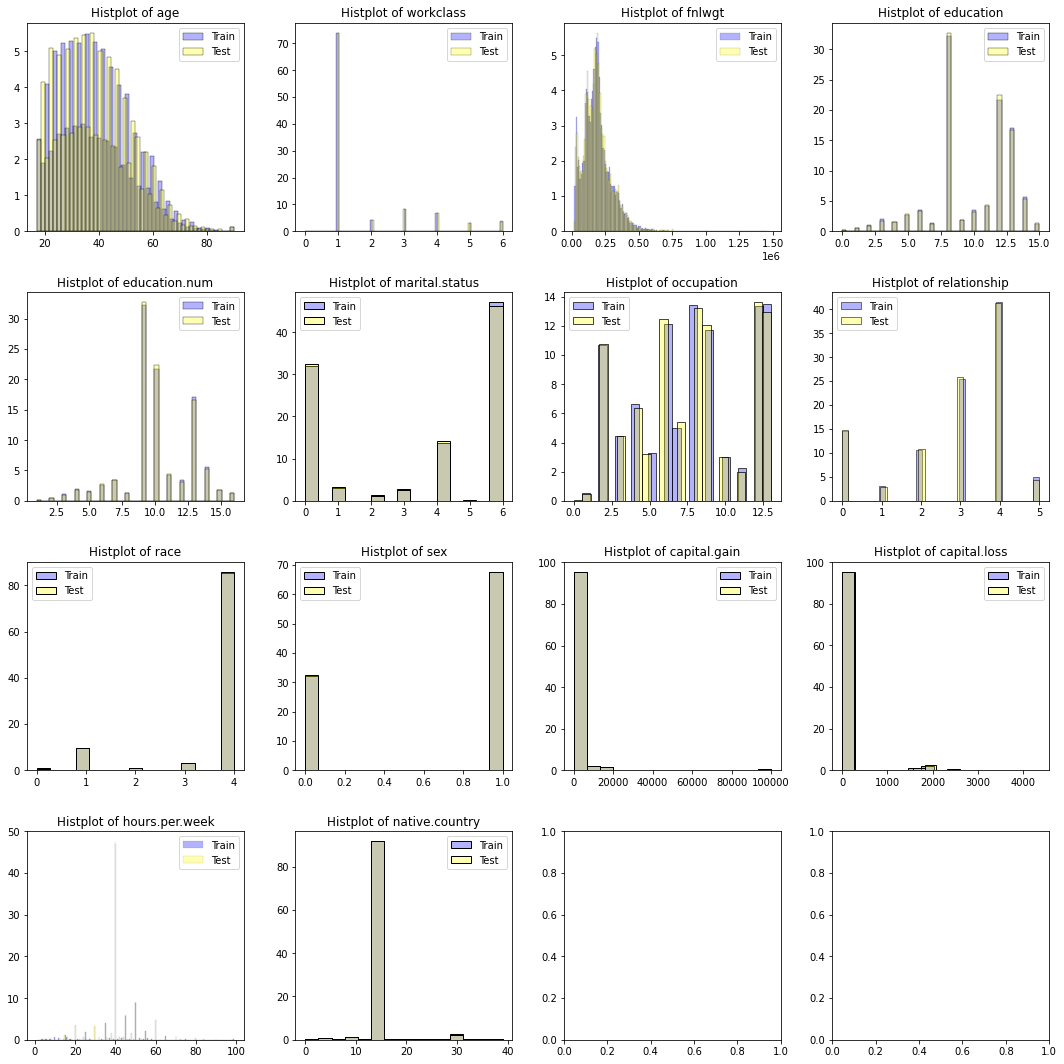

In [ ]:
# percent = sum은 막대들의 높이의 합이 100이 되도록 하는 것
# 범주형 데이터들은 비슷한 분포를 가진다는 것을 확인할 수 있다.
# age, fnlwgt, capital.gain, capital.loss 모두 양의 왜도를 지닌다. 그리고 capital과 관련된 변수 2개는 대부분의 값이 거의 0임을 알 수 있다.
# 한편, train, test의 분포는 상당히 유사하다고 할 수 있다.
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (15, 15))

column_list = test.columns

for index, column in enumerate(column_list):
    
    row = index // 4
    col = index % 4
    
    # Train data visualization
    sns.histplot(x = column, data = train, stat = "percent", color = "blue", alpha = 0.3, label = "Train", ax = axes[row][col])
    
    # Test data visualization
    sns.histplot(x = column, data = test, stat = "percent", color = "yellow", alpha = 0.3, label = "Test", ax = axes[row][col])
    
    axes[row][col].set_title("Histplot of {}".format(column))
    axes[row][col].set_xlabel("")
    axes[row][col].set_ylabel("")
    axes[row][col].legend()
    
fig.tight_layout(pad = 1.5)

#### 로그변환

In [ ]:
# 왜도와 첨도를 관측하고, 왜도와 첨도가 큰 데이터에 로그를 취한다.
numeric_columns = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
for column in numeric_columns:
  print("{:15}".format(column),
        'Skewness:{}'.format(train[column].skew()),
        'Kurtosis:{}'.format(train[column].kurt()))

age             Skewness:0.5347514796971361 Kurtosis:-0.1394013821130593
fnlwgt          Skewness:1.4170239926716877 Kurtosis:6.231188254166485
education.num   Skewness:-0.34014523794894624 Kurtosis:0.6163769181677043
capital.gain    Skewness:11.585169593969049 Kurtosis:144.5462131916584
capital.loss    Skewness:4.583033052806039 Kurtosis:20.085963911239503
hours.per.week  Skewness:0.3535615391484752 Kurtosis:3.2267895362092025


In [ ]:
# fnlwgt, capital.gain, capital.loss에 대해서 log변환을 사용해 주기로 함.
train["fnlwgt"] = train["fnlwgt"].apply(lambda x: np.log1p(x))
train["capital.gain"] = train["capital.gain"].apply(lambda x: np.log1p(x))
train["capital.loss"] = train["capital.loss"].apply(lambda x: np.log1p(x))

In [ ]:
# 여전히 정규분포에서는 많이 벗어난 모습을 보이지만 이전에 비해서는 훨씬 낫다
numeric_columns = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
for column in numeric_columns:
  print("{:15}".format(column),
        'Skewness:{}'.format(train[column].skew()),
        'Kurtosis:{}'.format(train[column].kurt()))

age             Skewness:0.5347514796971361 Kurtosis:-0.1394013821130593
fnlwgt          Skewness:-0.8616098997379611 Kurtosis:0.8897593266708816
education.num   Skewness:-0.34014523794894624 Kurtosis:0.6163769181677043
capital.gain    Skewness:3.0687133282593284 Kurtosis:7.6234161812546954
capital.loss    Skewness:4.332038680942931 Kurtosis:16.78697586510876
hours.per.week  Skewness:0.3535615391484752 Kurtosis:3.2267895362092025


In [ ]:
# test에 대해서도 log변환을 적용
test["fnlwgt"] = test["fnlwgt"].apply(lambda x: np.log1p(x))
test["capital.gain"] = test["capital.gain"].apply(lambda x: np.log1p(x))
test["capital.loss"] = test["capital.loss"].apply(lambda x: np.log1p(x))

#### 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
train.iloc[:,:-1] = scaler.fit_transform(train.iloc[:,:-1])
test = scaler.transform(test)

In [ ]:
test = pd.DataFrame(test, columns=train.columns[:-1])

#### 로그변환과 스케일링을 모두 적용 후 분포 확인

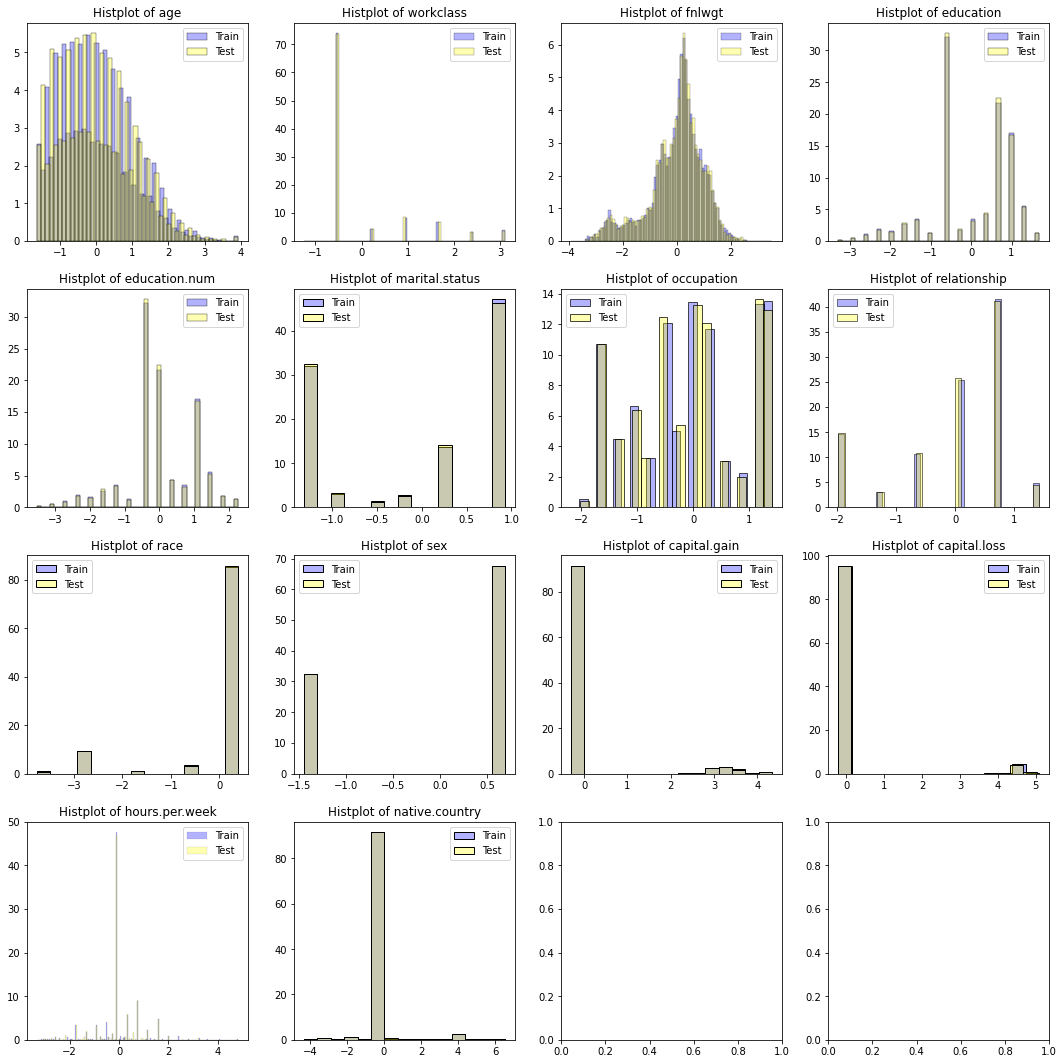

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (15, 15))

column_list = test.columns

for index, column in enumerate(column_list):
    
    row = index // 4
    col = index % 4
    
    # Train data visualization
    sns.histplot(x = column, data = train, stat = "percent", color = "blue", alpha = 0.3, label = "Train", ax = axes[row][col])
    
    # Test data visualization
    sns.histplot(x = column, data = test, stat = "percent", color = "yellow", alpha = 0.3, label = "Test", ax = axes[row][col])
    
    axes[row][col].set_title("Histplot of {}".format(column))
    axes[row][col].set_xlabel("")
    axes[row][col].set_ylabel("")
    axes[row][col].legend()
    
fig.tight_layout(pad = 1.5)

#### X와 y 나누기

In [ ]:
X_train = train.drop('target', axis=1)
y_train = train[['target']]
X_test = test

In [ ]:
X_train.shape

(15636, 14)

## 모델 사용하기

In [ ]:
import tensorflow as tf
from keras import activations
from keras.layers import Dense, Dropout, LSTM, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import keras.metrics

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

#### mlp

In [ ]:
mlp1 = Sequential(name='mlp1')
mlp1.add(Dense(units=4000, input_dim=14, activation='relu', name='hidden1'))
mlp1.add(Dropout(0.2, name='dropout1'))
mlp1.add(Dense(units=800, activation='relu', name='hiddne2'))
mlp1.add(Dropout(0.2, name='dropout2'))
mlp1.add(Dense(150, activation='relu', name='hidden3'))
mlp1.add(Dropout(0.2, name='dropout3'))
mlp1.add(Dense(30, activation='relu', name='hiddne4'))
mlp1.add(Dropout(0.2, name='dropout4'))
mlp1.add(Dense(units=1, activation='sigmoid', name='output'))

mlp1.summary()

Model: "mlp1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 4000)              60000     
                                                                 
 dropout1 (Dropout)          (None, 4000)              0         
                                                                 
 hiddne2 (Dense)             (None, 800)               3200800   
                                                                 
 dropout2 (Dropout)          (None, 800)               0         
                                                                 
 hidden3 (Dense)             (None, 150)               120150    
                                                                 
 dropout3 (Dropout)          (None, 150)               0         
                                                                 
 hiddne4 (Dense)             (None, 30)                4530   

In [ ]:
mlp1.compile(optimizer=Adam(1e-4), loss='BinaryCrossentropy', metrics=['accuracy'])
mc = ModelCheckpoint(filepath='mlp_best.h5', monitor='accuracy', save_best_only=True)

In [ ]:
# callback을 사용하는 것이 큰 의미가 없어 사용하지 않았습니다
history = mlp1.fit(X_train, y_train, epochs=300, batch_size=500, callbacks=[mc])

Epoch 1/300
32/32 [==============================] - 2s 20ms/step - loss: 0.4732 - accuracy: 0.7889
Epoch 2/300
32/32 [==============================] - 1s 18ms/step - loss: 0.3600 - accuracy: 0.8329
Epoch 3/300
32/32 [==============================] - 1s 19ms/step - loss: 0.3519 - accuracy: 0.8395
Epoch 4/300
32/32 [==============================] - 0s 15ms/step - loss: 0.3494 - accuracy: 0.8381
Epoch 5/300
32/32 [==============================] - 0s 15ms/step - loss: 0.3447 - accuracy: 0.8393
Epoch 6/300
32/32 [==============================] - 1s 21ms/step - loss: 0.3415 - accuracy: 0.8404
Epoch 7/300
32/32 [==============================] - 1s 20ms/step - loss: 0.3406 - accuracy: 0.8429
Epoch 8/300
32/32 [==============================] - 0s 15ms/step - loss: 0.3386 - accuracy: 0.8426
Epoch 9/300
32/32 [==============================] - 0s 15ms/step - loss: 0.3359 - accuracy: 0.8418
Epoch 10/300
32/32 [==============================] - 1s 18ms/step - loss: 0.3360 - accuracy: 0.8434

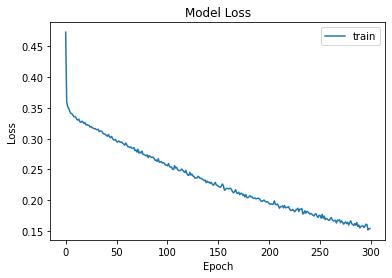

In [ ]:
def plt_show_loss(history):
  plt.plot(history.history['loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc=0)

plt_show_loss(history)
plt.show()

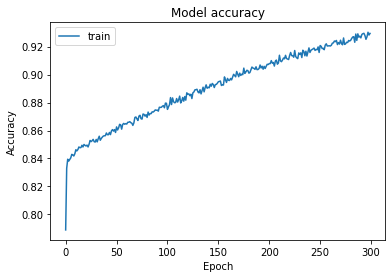

In [ ]:
def plt_show_acc(history):
  plt.plot(history.history['accuracy'])
  plt.title("Model accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['train', 'test'], loc=0)

plt_show_acc(history)
plt.show()

#### LSTM

In [ ]:
LSTM_X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
LSTM_X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
time_step=1
lstm1 = Sequential(name='lstm1')
lstm1.add(LSTM(2000, activation='relu', input_shape=(time_step, 14), name='LSTM1'))
lstm1.add(Dropout(0.25,name='dropout1'))
lstm1.add(Dense(units=400, activation='relu', name='hiddne1'))
lstm1.add(Dropout(0.25, name='dropout2'))
lstm1.add(Dense(100, activation='relu', name='hidden2'))
lstm1.add(Dropout(0.25, name='dropout3'))
lstm1.add(Dense(25, activation='relu', name='hiddne3'))
lstm1.add(Dropout(0.25, name='dropout4'))
lstm1.add(Dense(units=1, activation='sigmoid', name='output'))

lstm1.summary()

Model: "lstm1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 2000)              16120000  
                                                                 
 dropout1 (Dropout)          (None, 2000)              0         
                                                                 
 hiddne1 (Dense)             (None, 400)               800400    
                                                                 
 dropout2 (Dropout)          (None, 400)               0         
                                                                 
 hidden2 (Dense)             (None, 100)               40100     
                                                                 
 dropout3 (Dropout)          (None, 100)               0         
                                                                 
 hiddne3 (Dense)             (None, 25)                2525  

In [ ]:
lstm1.compile(optimizer=Adam(1e-5), loss='BinaryCrossentropy', metrics=['accuracy'])
mc = ModelCheckpoint(filepath='lstm_best.h5', monitor='accuracy', save_best_only=True)

In [ ]:
history2 = lstm1.fit(LSTM_X_train, y_train, epochs=300, batch_size=500, callbacks=[mc])

Epoch 1/300
32/32 [==============================] - 4s 66ms/step - loss: 0.6919 - accuracy: 0.5656
Epoch 2/300
32/32 [==============================] - 2s 67ms/step - loss: 0.6851 - accuracy: 0.7567
Epoch 3/300
32/32 [==============================] - 2s 67ms/step - loss: 0.6761 - accuracy: 0.7769
Epoch 4/300
32/32 [==============================] - 2s 67ms/step - loss: 0.6638 - accuracy: 0.7813
Epoch 5/300
32/32 [==============================] - 2s 67ms/step - loss: 0.6485 - accuracy: 0.7857
Epoch 6/300
32/32 [==============================] - 2s 67ms/step - loss: 0.6320 - accuracy: 0.7894
Epoch 7/300
32/32 [==============================] - 2s 67ms/step - loss: 0.6131 - accuracy: 0.8005
Epoch 8/300
32/32 [==============================] - 2s 66ms/step - loss: 0.5923 - accuracy: 0.8071
Epoch 9/300
32/32 [==============================] - 2s 68ms/step - loss: 0.5692 - accuracy: 0.8145
Epoch 10/300
32/32 [==============================] - 2s 67ms/step - loss: 0.5464 - accuracy: 0.8175

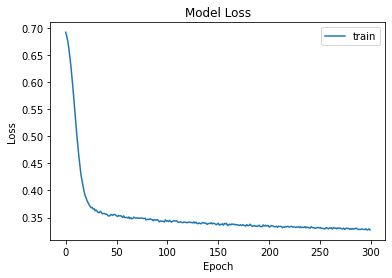

In [ ]:
plt_show_loss(history2)
plt.show()

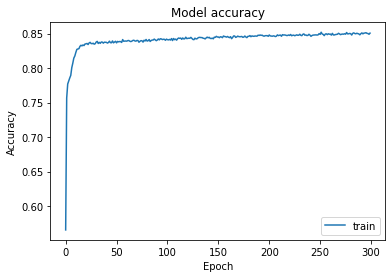

In [ ]:
plt_show_acc(history2)
plt.show()

#### 머신러닝 모델들

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 61 kB/s 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.svm import SVC    #SVC
from sklearn.linear_model import LogisticRegression  #LogisticRegression
from sklearn.tree import DecisionTreeClassifier  #DecisionTree
from sklearn.naive_bayes import GaussianNB   #가우시안
from sklearn.naive_bayes import ComplementNB #complement 가우지안
from sklearn.ensemble import RandomForestClassifier #RandomForest
from sklearn.ensemble import AdaBoostClassifier   #Adaboost   
from xgboost import XGBClassifier   #XGBoost
from lightgbm import LGBMClassifier  #Light GBM
from catboost import CatBoostClassifier #Catboost
from sklearn.ensemble import ExtraTreesClassifier #extratreesclassifier

from sklearn.ensemble import VotingClassifier #voting 
from sklearn.ensemble import StackingClassifier #stacking
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# 이전의 작업(소득예측 2)을 통해 찾은 하이퍼파라미터를 사용하였습니다
knn = KNeighborsClassifier(n_neighbors=26, weights='uniform')
svc = SVC(kernel='rbf',C=10)
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=16, random_state=42)
rf = RandomForestClassifier(max_depth = 18, min_samples_leaf = 2, min_samples_split = 14, n_estimators = 170, random_state=42)
ada = AdaBoostClassifier(n_estimators = 540, learning_rate = 0.7, random_state=42)
xgb = XGBClassifier(max_depth = 10, n_estimators= 350, learning_rate = 0.01081053261365495, subsample = 0.783876773469082, colsample_bytree = 0.9540872774964744, random_state=42)
lgb = LGBMClassifier(max_depth = 10, n_estimators = 450, learning_rate = 0.017176619845728085, subsample = 0.9057955079535207, colsample_bytree = 0.8159300849840903, random_state=42)
etc = ExtraTreesClassifier(max_depth = 26, min_samples_leaf = 2, min_samples_split = 8, n_estimators = 280, random_state=42)
cat = CatBoostClassifier(silent=True)

tuned_model_list = [knn,svc, dt, rf, ada, xgb,lgb,etc,cat]

#### 머신러닝 모델과 딥러닝 모델의 결과 종합하기

In [ ]:
model_list = [dt, rf, ada, xgb, lgb, etc, cat]
for model in model_list:
  model.fit(X_train, y_train)

In [ ]:
# predict proba를 사용해 target 값이 0과 1이 될 확률을 얻음
dt_pred = dt.predict_proba(X_test)[:,1]
rf_pred = rf.predict_proba(X_test)[:,1]
ada_pred = ada.predict_proba(X_test)[:,1]
xgb_pred = xgb.predict_proba(X_test)[:,1]
lgb_pred = lgb.predict_proba(X_test)[:,1]
etc_pred = etc.predict_proba(X_test)[:,1]
cat_pred = cat.predict_proba(X_test)[:,1]

mlp_pred = mlp1.predict(X_test).reshape(15081,)
lstm_pred = lstm1.predict(LSTM_X_test).reshape(15081,)

In [ ]:
blended_pred = dt_pred + rf_pred + ada_pred  + lgb_pred + etc_pred  + cat_pred * 2 + mlp_pred * 2 + lstm_pred

In [ ]:
predictions = (blended_pred > 5) * 1

#### 딥러닝 모델만 사용한 결과

In [ ]:
mlp_pred = (mlp_pred > 0.5 ) * 1
lstm_pred = (lstm_pred> 0.5) * 1

## 제출할 파일 생성

In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission['target'] = predictions
submission.to_csv('blending.csv', index=False)
submission['target'].value_counts()

0    12027
1     3054
Name: target, dtype: int64

In [ ]:
submission['target'] = mlp_pred
submission.to_csv('mlp1.csv', index=False)
submission['target'].value_counts()

0    11655
1     3426
Name: target, dtype: int64

In [ ]:
submission['target'] = lstm_pred
submission.to_csv('lstm1.csv', index=False)
submission['target'].value_counts()

0    11874
1     3207
Name: target, dtype: int64